In [1]:
import os
import mmcv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mmengine.config import Config
from mmengine.registry import init_default_scope
from mmdet.apis import inference_detector, init_detector
from mmrotate.visualization import RotLocalVisualizer

# Set the GPU to use
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Configuration and checkpoint files
config_file = 'configs/rhino/rhino_phc_haus-4scale_r50_2xb2-36e_dior.py'
checkpoint_file = 'work_dirs/rhino_phc_haus-4scale_r50_2xb2-36e_dior/epoch_24.pth'
image_dir = 'data/DIOR/JPEGImages-test'
out_dir = 'results/utils'


In [3]:
# Load the configuration file
cfg = Config.fromfile(config_file)
init_default_scope(cfg.get('default_scope', 'mmrotate'))

# Initialize the model
model = init_detector(cfg, checkpoint_file, device='cuda:0')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Initialize the visualizer
visualizer = RotLocalVisualizer()

image_files = os.listdir(image_dir)[:5]
num_images = len(image_files)

Loads checkpoint by local backend from path: work_dirs/rhino_phc_haus-4scale_r50_2xb2-36e_dior/epoch_24.pth
01/28 15:12:49 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
01/28 15:12:49 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.


In [5]:
objects_list = ["Airplane", "Airport", "Baseball field", "Basketball court", "Bridge", "Chimney", "Dam", "Expressway service area", "Expressway toll station", "Golf course", "Ground track field", "Harbor", "Overpass", "Ship", "Stadium", "Storage tank", "Tennis court", "Train station", "Vehicle", "Wind mill", "Total"]
objects_list = pd.Series(objects_list)
objects_list

0                    Airplane
1                     Airport
2              Baseball field
3            Basketball court
4                      Bridge
5                     Chimney
6                         Dam
7     Expressway service area
8     Expressway toll station
9                 Golf course
10         Ground track field
11                     Harbor
12                   Overpass
13                       Ship
14                    Stadium
15               Storage tank
16               Tennis court
17              Train station
18                    Vehicle
19                  Wind mill
20                      Total
dtype: object

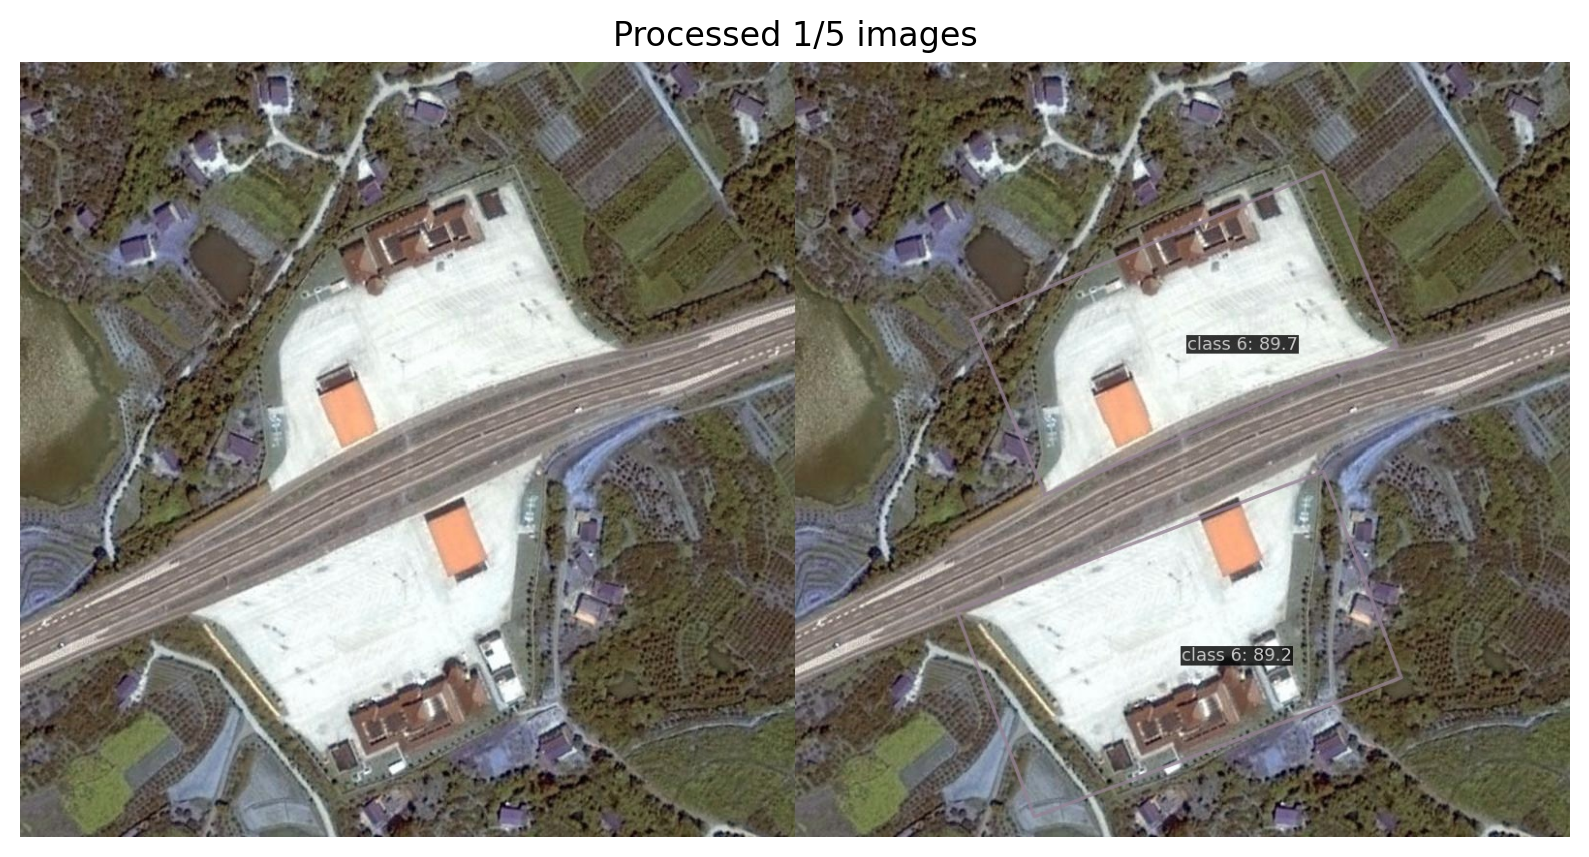

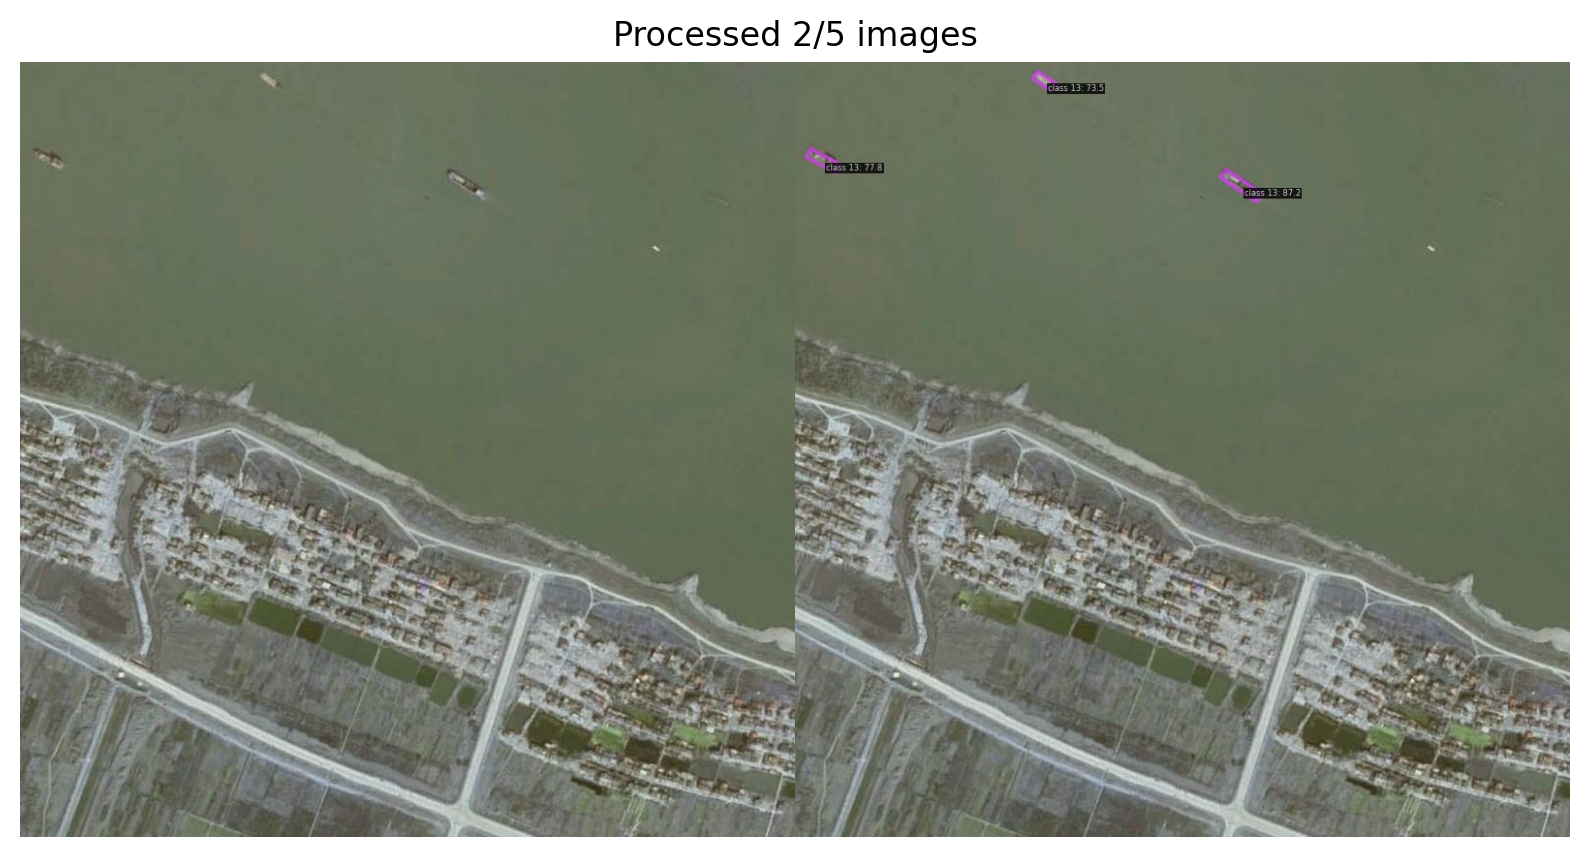

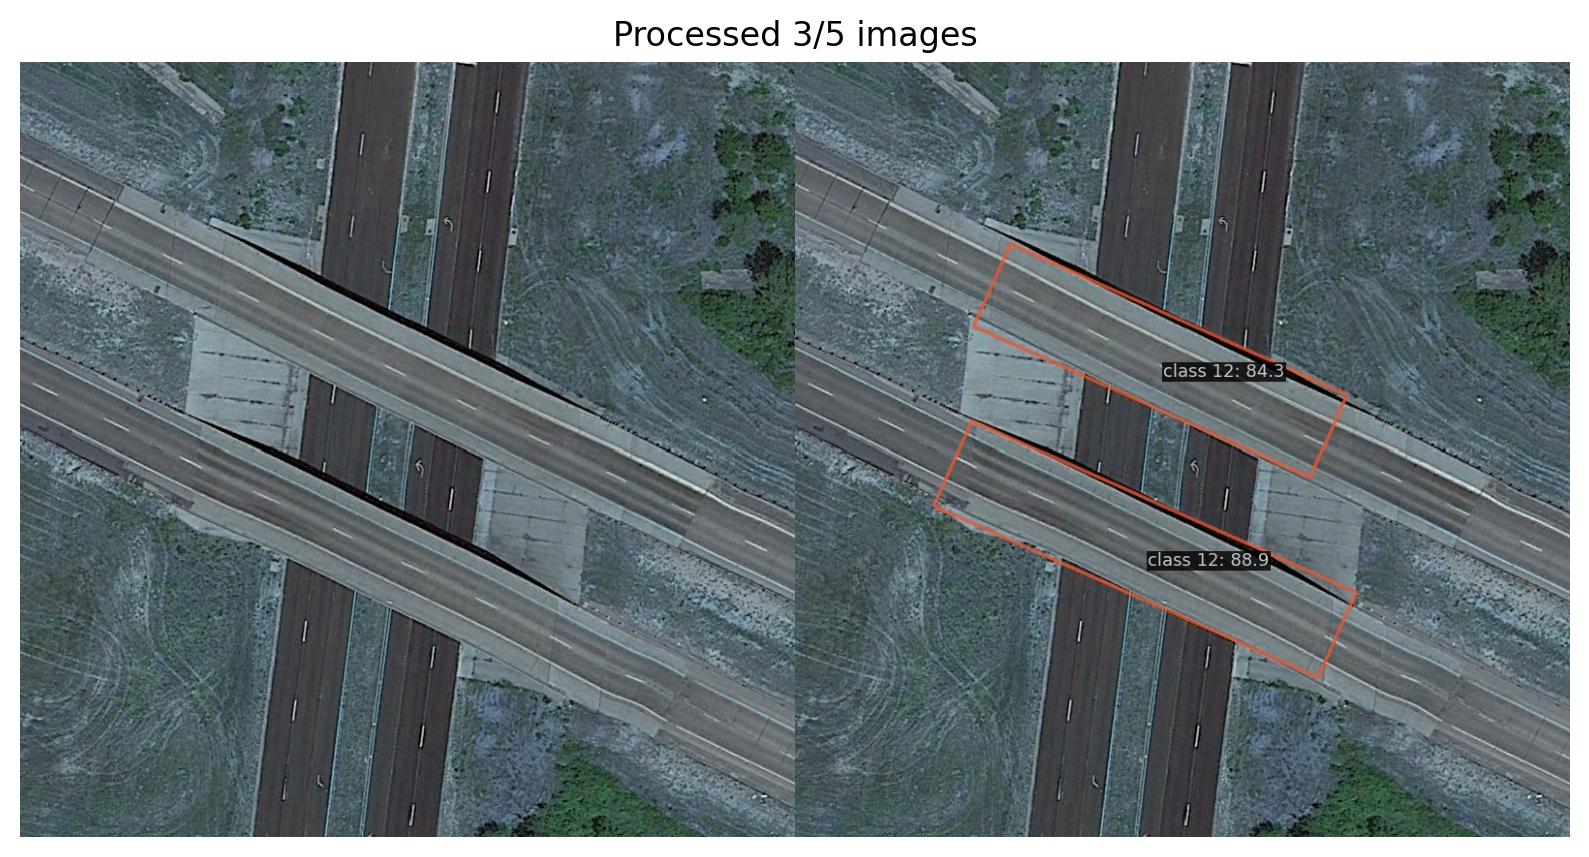

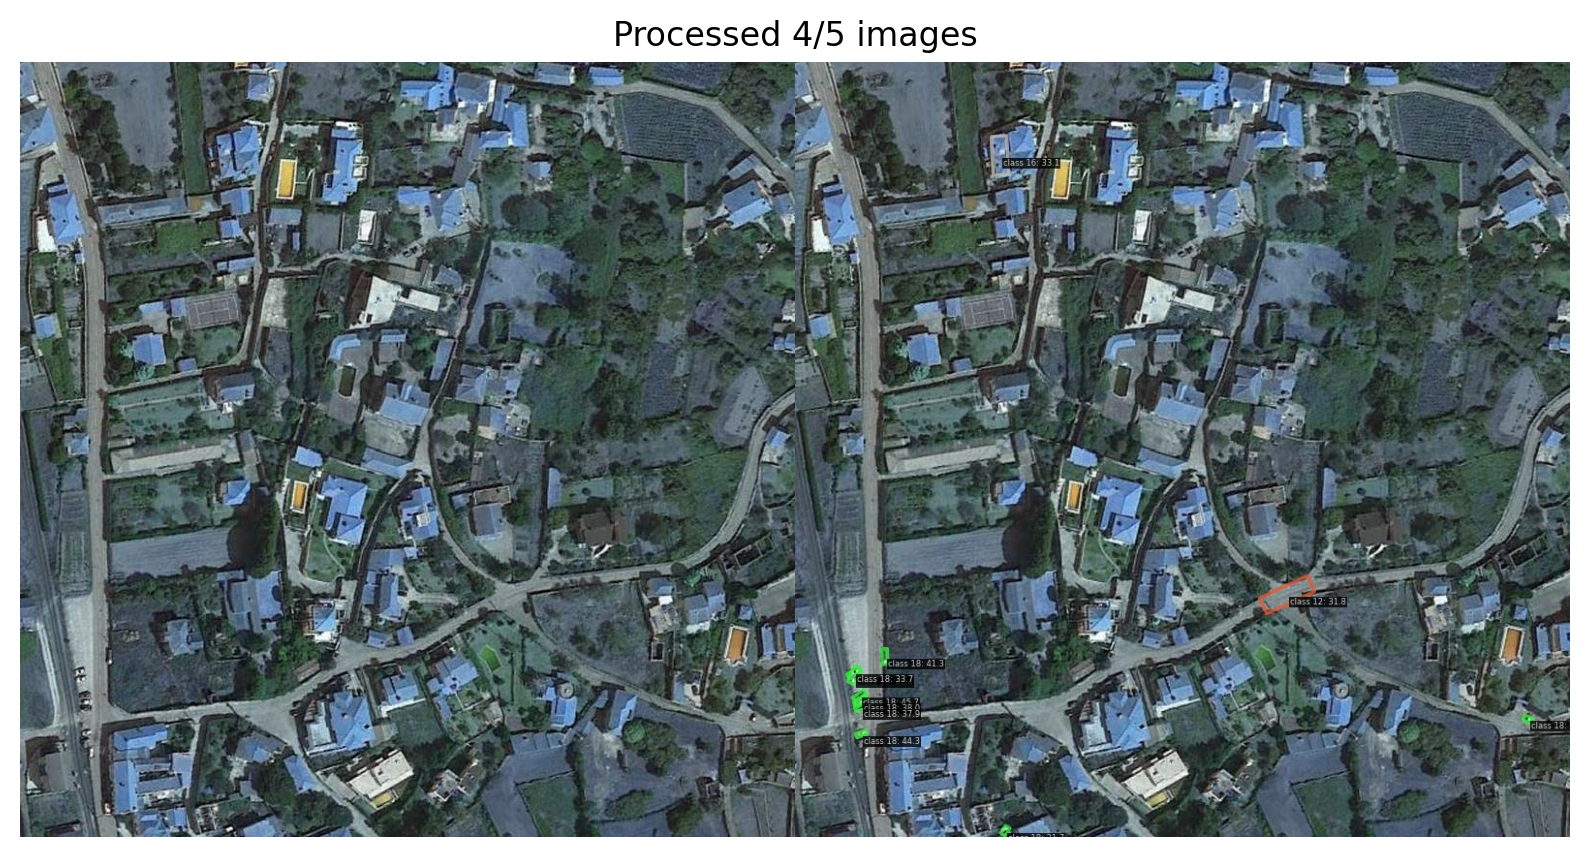

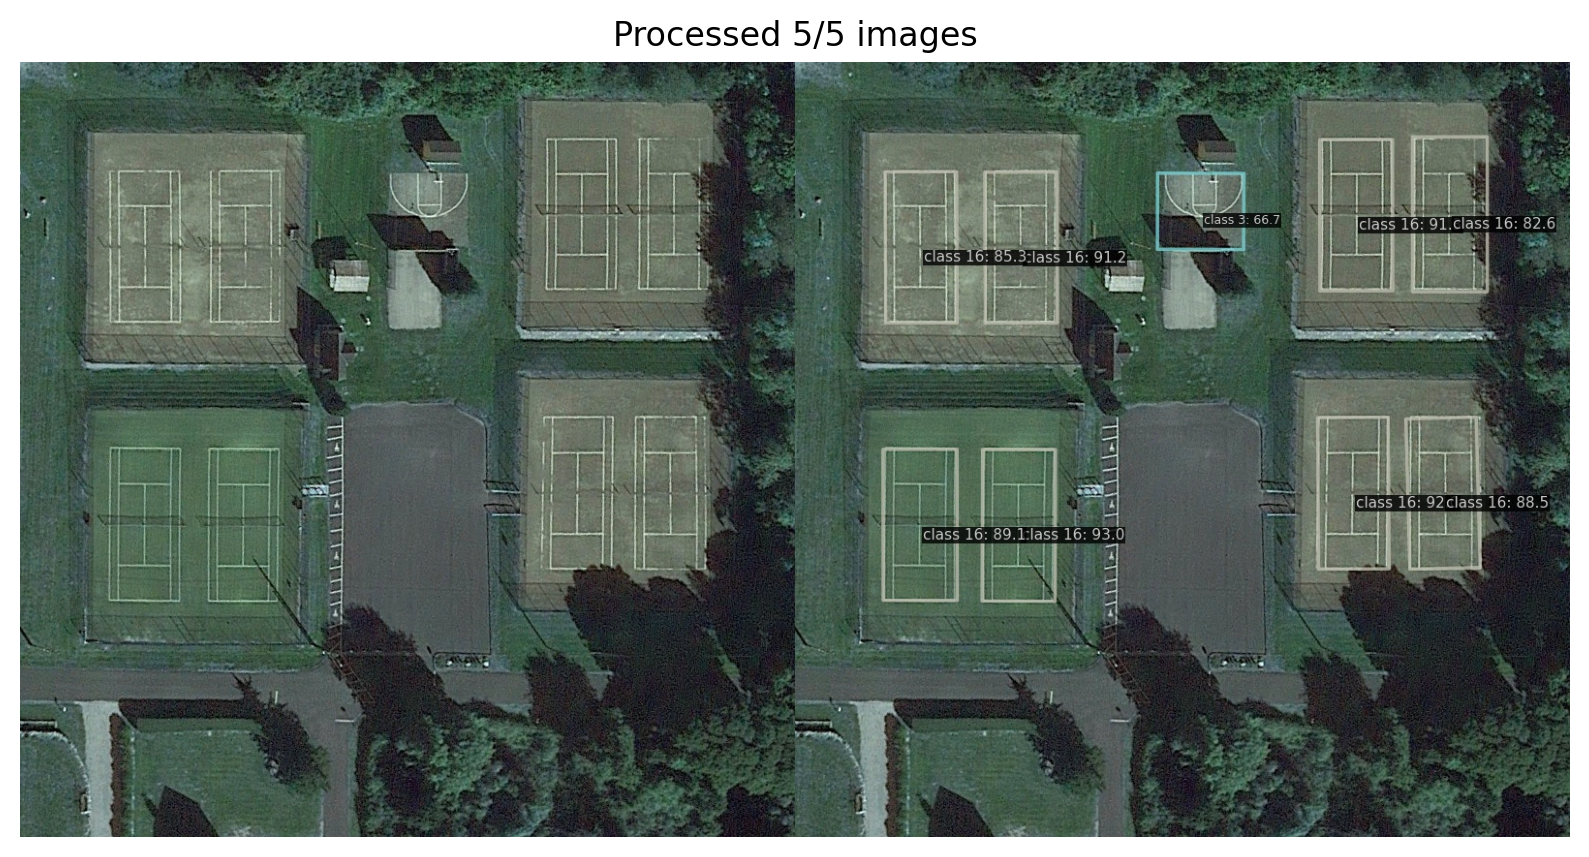

0

: 

In [ ]:
for i, image_name in enumerate(image_files):
    image_path = os.path.join(image_dir, image_name)
    result = inference_detector(model, image_path)

    # Visualize the results
    visualizer.add_datasample(
        image_name,
        mmcv.imread(image_path),
        result,
        show=False,
        out_file=os.path.join(out_dir, image_name) if out_dir else None
    )

    # Display the image with bounding boxes
    img = mmcv.imread(os.path.join(out_dir, image_name))
    plt.figure(figsize=(10, 10))
    plt.imshow(mmcv.bgr2rgb(img))
    plt.axis('off')
    plt.title(f'Processed {i + 1}/{num_images} images')
    plt.show()

# delete the out_dir
os.system(f'rm -rf {out_dir}')